Name: Bindi Shah<br>
Class : BE9 - P9<br>
Roll no: 43110<br>
Title: Assignment 3: Build the Image classification model<br>

In [117]:
#importing the libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

In [118]:
#grabbing CIFAR10 dataset 
#The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. 
#The dataset is divided into 50,000 training images and 10,000 testing images. 
#The classes are mutually exclusive and there is no overlap between them.

(X_Train, Y_train), (X_Test, Y_Test) = datasets.cifar10.load_data()


In [119]:
X_Train.shape # training samples are 50k, each image is 32*32 and 3 is for rgb channel

(50000, 32, 32, 3)

In [120]:
X_Test.shape

(10000, 32, 32, 3)

In [121]:
Y_Test.shape

(10000, 1)

In [122]:
Y_train.shape

(50000, 1)

In [123]:
Y_train.shape

(50000, 1)

In [124]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [125]:
class_names[9]

'truck'

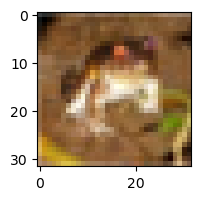

In [126]:
plt.figure(figsize=(15,2))
plt.imshow(X_Train[0])

In [127]:
Y_train = Y_train.reshape(-1,)

In [130]:
def plot_sample(X,y, index): 
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])

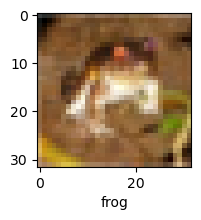

In [131]:
plot_sample(X_Train, Y_train, 0)

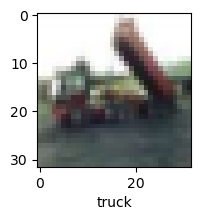

In [132]:
plot_sample(X_Train, Y_train, 2)

In [133]:
X_Train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [136]:
X_Train = X_Train/255
X_Test = X_Test/255

In [ ]:
Now build a simple neural architecture to train the model

In [139]:
#building CNN model
#A Sequential model is appropriate for a plain stack of layers where eachlayer has exactly one input tensor
#and one output tensor.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [142]:
#model compilation
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs = 4
h = model.fit(X_Train, Y_train, epochs=epochs, validation_data=(X_Test, Y_Test))

Epoch 1/4
1563/1563 [==============================] - 44s 28ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.1097
Epoch 2/4
1563/1563 [==============================] - 45s 29ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3029 - val_accuracy: 0.1001
Epoch 3/4
1563/1563 [==============================] - 41s 26ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3031 - val_accuracy: 0.1009
Epoch 4/4
1563/1563 [==============================] - 46s 29ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1003
